## 1. HyperKvasir Dataset
### 1.1. Image labels

In [35]:
import pandas as pd

df1 = pd.read_csv('file-names/not-filtered/image-labels.csv')
print(f'# of Labeled Images: {df1.shape[0]}')
df1.drop(df1.loc[df1['Organ'] != 'Upper GI'].index, inplace=True)
print(f'# of Upper GI Labels: {df1.shape[0]}')
df1.drop(df1.loc[df1['Classification'] != 'anatomical-landmarks'].index, inplace=True)
df1.reset_index(drop=True, inplace=True)
print(f'# of Anatomical Landmark Labels: {df1.shape[0]}')
print(df1['Finding'].value_counts())
df1.to_csv('file-names/filtered-names/image-labels.csv')

# of Labeled Images: 10662
# of Upper GI Labels: 3452
# of Anatomical Landmark Labels: 2695
pylorus              999
z-line               932
retroflex-stomach    764
Name: Finding, dtype: int64


| # of Labeled Images | # of Upper GI Labels | # of Anatomical Landmark Labels | # of Z-line Labels | # of Retroflex Stomach Labels | # of Pylorus Labels |
| - | - | - | - | - | - |
| 10662 | 3452 | 2695 | 932 | 764 | 999 |

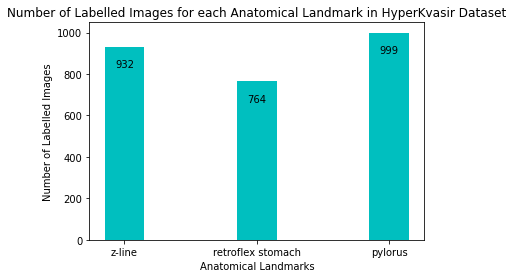

In [38]:
import matplotlib.pyplot as plt

width = 0.3
data = {'z-line': 932, 'retroflex stomach': 764, 'pylorus': 999}
names = list(data.keys())
values = list(data.values())

fig, ax = plt.subplots()
ax.bar(names, values, width, color='c')
plt.xlabel('Anatomical Landmarks')
plt.ylabel('Number of Labelled Images')
plt.title('Number of Labelled Images for each Anatomical Landmark in HyperKvasir Dataset')

for i in range(len(names)):
    plt.text(i,values[i]-100,values[i], ha='center')

plt.show()

<p align="center">
   <img width="800" height="400" src=images/labelled-image-count-hyperkvasir-paper.png>
</p>
<p align="center">
<strong>Figure. 2</strong>: Number of image labels from HyperKvasir paper.
</p>

### 1.2. Video Labels

In [8]:
lis1 = []
df2 = pd.read_csv('file-names/video-labels.csv')
print(df2.shape)
df2.drop(df2.loc[df2['Organ'] != 'Upper GI'].index, inplace=True)
df2.reset_index(drop=True, inplace=True)
print(df2.shape)
for i in range(df2.shape[0]):
    if (df2['Classification 1'].iloc[i] != 'Anatomical landmarks') \
        & (df2['Classification 2'].iloc[i] != 'Anatomical landmarks'):
            lis1.append(i)
df2.drop(df2.index[lis1], inplace=True)
df2.reset_index(drop=True, inplace=True)
print(df2.shape)


In [9]:
for i in range(df2.shape[0]):
    if (df2['Classification 1'].iloc[i] == 'Anatomical landmarks') \
        & (df2['Classification 2'].iloc[i] == 'Anatomical landmarks'):
            lis1.append(i)
count1 = df2['Finding 1'].value_counts() 
count2= df2['Finding 2'].value_counts()
count3 = count1.add(count2, fill_value=0)
print(count3)
df2.to_csv('file-names/filtered-names/video-labels.csv')

| # of Labeled Videos | # of Upper GI Labels | # of Anatomical Landmark Labels | # of Z-line Labels | # of Retroflex Stomach Labels | # of Pyrolus Labels |
| - | - | - | - | - | - |
| 374 | 60 | 12 | 5 | 2 | 6 | 